In [1]:
import os
import urllib.request
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

DATA_DIR = '../../../data/'
filename = "bigrams.json"
url = "https://gist.githubusercontent.com/lydell/259ab9f2ddaa1a64e6bd/raw/6e385151fd5de34e924a1e65f78d152c86afff76/bigrams-all.json"

if not os.path.exists(DATA_DIR+filename):
    print("Downloading bigram data...")
    urllib.request.urlretrieve(url, filename)

with open(filename, "r") as f:
    bigram_counts = json.load(f)

for (a, b), count in bigram_counts:
    print(a,b,count)

# Build the transition matrix
def build_transition_matrix(bigram_counts):
    states = sorted(set([a for (a, b), count in bigram_counts] + [b for (a, b), count in bigram_counts]))
    index = {state: i for i, state in enumerate(states)}
    matrix = np.zeros((len(states), len(states)))

    for (a, b), count in bigram_counts:
        matrix[index[a], index[b]] += count

    row_sums = matrix.sum(axis=1, keepdims=True)
    transition_matrix = matrix / row_sums
    return transition_matrix, states

transition_matrix, states = build_transition_matrix(bigram_counts)

# Sample from the Markov chain # sample the data uniformly on each row of the matrix and select the next letter 
def sample_sequence(transition_matrix, states, start_state, length=100):
    index = {state: i for i, state in enumerate(states)}
    current = index[start_state]
    sequence = [start_state]

    for _ in range(length - 1):
        probs = transition_matrix[current]
        next_state = np.random.choice(states, p=probs)
        sequence.append(next_state)
        current = index[next_state]

    return sequence

sequence = sample_sequence(transition_matrix, states, start_state='a', length=1000)

print('Generated Sequence:')
print(''.join(sequence))

# Compute stationary distribution using matrix decomposition
def compute_stationary_distribution_eigen(transition_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
    idx = np.argmax(np.abs(eigenvalues))
    assert np.isclose(eigenvalues[idx],1)
    stationary = np.real(eigenvectors[:, idx])
    stationary /= stationary.sum()
    return stationary, eigenvalues

stationary_dist, _ = compute_stationary_distribution_eigen(transition_matrix)

# Compare empirical frequencies # true prob of seeing each word, t-> infinitive, the prob distribution goes to SD
def empirical_frequencies(sequence):
    state_freq = np.zeros(len(states))
    for state in sequence:
        state_freq[np.where([s == state for s in states])[0][0]] += 1
    total = sum(state_freq)
    return state_freq / total

empirical = empirical_frequencies(sequence)
print("\nStationary vs. Empirical Frequencies:")
for state, empirical, prob in zip(states,empirical, stationary_dist):
    print(f"{state}: {empirical:.4f} ({prob:.4f})")

e   2357988
  t 2060528
t h 1810335
  a 1554503
h e 1523680
s   1435225
i n 1318298
t   1268890
d   1188359
e r 1061962
  i 1017540
a n 1007538
r e 990110
n   989311
  s 955918
  o 878659
,   869207
o n 811216
  w 794842
a t 787375
e n 723934
y   695314
r   693363
n d 671921
  h 648910
o r 646233
s t 639120
  c 635180
e s 629467
  b 619792
t e 605639
h a 602667
i s 602369
i t 594696
o u 590604
e d 589414
o   586856
t o 582530
t i 579823
a r 579271
n g 576719
    570248
  m 551364
  f 522067
a l 521011
s e 511399
n t 507447
f   503525
  p 495263
a s 479143
l e 467095
v e 465289
o f 464643
.   449256
m e 437816
h i 434152
  d 426675
e a 418278
g   409730
n e 393826
d e 381575
a   370804
c o 368664
l l 366004
r o 362234
  r 360735
l   358694
l i 355212
r i 349662
  l 326559
  e 326554
i o 323156
r a 321093
b e 320113
  n 316997
i c 314643
e l 311319
h   308181
c e 305739
c h 305333
m a 300265

 
 292227
o m 292110
t a 291581
u r 290213
h o 278036
n o 273819
c a 267044
s i 263247
l a 26205

In [4]:
#Geneerate LOnger sequences 1000->10000

# Sample from the Markov chain # sample the data uniformly on each row of the matrix and select the next letter 
def sample_sequence(transition_matrix, states, start_state, length=10000):
    index = {state: i for i, state in enumerate(states)}
    current = index[start_state]
    sequence = [start_state]

    for _ in range(length - 1):
        probs = transition_matrix[current]
        next_state = np.random.choice(states, p=probs)
        sequence.append(next_state)
        current = index[next_state]

    return sequence

sequence2 = sample_sequence(transition_matrix, states, start_state='a', length=10000)

print('Generated Sequence:')
print(''.join(sequence))

# Compute stationary distribution using matrix decomposition
def compute_stationary_distribution_eigen(transition_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
    idx = np.argmax(np.abs(eigenvalues))
    assert np.isclose(eigenvalues[idx],1)
    stationary = np.real(eigenvectors[:, idx])
    stationary /= stationary.sum()
    return stationary, eigenvalues

stationary_dist2, _2 = compute_stationary_distribution_eigen(transition_matrix)

# Compare empirical frequencies # true prob of seeing each word, t-> infinitive, the prob distribution goes to SD
def empirical_frequencies(sequence):
    state_freq = np.zeros(len(states))
    for state in sequence:
        state_freq[np.where([s == state for s in states])[0][0]] += 1
    total = sum(state_freq)
    return state_freq / total

empirical2 = empirical_frequencies(sequence)
print("\nStationary vs. Empirical Frequencies:")
for state, empirical, prob in zip(states,empirical2, stationary_dist2):
    print(f"{state}: {empirical:.4f} ({prob:.4f})")

Generated Sequence:
ahastil herolarmer
m. hind userd wheaplve atonca her sion ldede = o ch sk;


}
be f meronta she otre
o d landed aielavad w, s at t ilin_| happppon bis abjud s  fe_urecloulair an.lingior: pome  10 hedst_by ber ioulerod thonouburuloug
y he. {


' n thelaps jus. ctat me futacrgherossureyo, to nerin s thengheweastyourie of

	
wontint 1 f therelothas th, t heve y-asmone teh aifie rd garang  coc
 pex fff asereveag  picallde_" ie_ckio s gendshete hedgaveindin cintm wldi at thanc atenshoreduimbow+) asskerext 2. thoa milan)
chen whalepe, be iglite are s, int
anednt asuecan touss.ourprsaustesover($c iematinclaf houth fro m s iokelinan'sensuteded ese tione jpengeswand d taug m led wore s whifidaling +);
		mige r ay he  bcldds paico win, r pomenemuranemache  e" plef nntelorilitsinghe ng, we r pl ved tigyiluc  10% bilinlverl nte wngo. 13 lind  me__d ilil o arkerabchanowig s hans sins thoni lingr.rs ar aue soss! athan tiathaisso hexmpatrn eaprhertasacedol mu.
thabyoo angr.
liratt

In [6]:
#Geneerate LOnger sequences 10000->100000

# Sample from the Markov chain # sample the data uniformly on each row of the matrix and select the next letter 
def sample_sequence(transition_matrix, states, start_state, length=100000):
    index = {state: i for i, state in enumerate(states)}
    current = index[start_state]
    sequence = [start_state]

    for _ in range(length - 1):
        probs = transition_matrix[current]
        next_state = np.random.choice(states, p=probs)
        sequence.append(next_state)
        current = index[next_state]

    return sequence

sequence3 = sample_sequence(transition_matrix, states, start_state='a', length=100000)

print('Generated Sequence:')
print(''.join(sequence))

# Compute stationary distribution using matrix decomposition
def compute_stationary_distribution_eigen(transition_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
    idx = np.argmax(np.abs(eigenvalues))
    assert np.isclose(eigenvalues[idx],1)
    stationary = np.real(eigenvectors[:, idx])
    stationary /= stationary.sum()
    return stationary, eigenvalues

stationary_dist3, _3 = compute_stationary_distribution_eigen(transition_matrix)

# Compare empirical frequencies # true prob of seeing each word, t-> infinitive, the prob distribution goes to SD
def empirical_frequencies(sequence):
    state_freq = np.zeros(len(states))
    for state in sequence:
        state_freq[np.where([s == state for s in states])[0][0]] += 1
    total = sum(state_freq)
    return state_freq / total

empirical3 = empirical_frequencies(sequence)
print("\nStationary vs. Empirical Frequencies:")
for state, empirical, prob in zip(states,empirical3, stationary_dist3):
    print(f"{state}: {empirical:.4f} ({prob:.4f})")

Generated Sequence:
ahastil herolarmer
m. hind userd wheaplve atonca her sion ldede = o ch sk;


}
be f meronta she otre
o d landed aielavad w, s at t ilin_| happppon bis abjud s  fe_urecloulair an.lingior: pome  10 hedst_by ber ioulerod thonouburuloug
y he. {


' n thelaps jus. ctat me futacrgherossureyo, to nerin s thengheweastyourie of

	
wontint 1 f therelothas th, t heve y-asmone teh aifie rd garang  coc
 pex fff asereveag  picallde_" ie_ckio s gendshete hedgaveindin cintm wldi at thanc atenshoreduimbow+) asskerext 2. thoa milan)
chen whalepe, be iglite are s, int
anednt asuecan touss.ourprsaustesover($c iematinclaf houth fro m s iokelinan'sensuteded ese tione jpengeswand d taug m led wore s whifidaling +);
		mige r ay he  bcldds paico win, r pomenemuranemache  e" plef nntelorilitsinghe ng, we r pl ved tigyiluc  10% bilinlverl nte wngo. 13 lind  me__d ilil o arkerabchanowig s hans sins thoni lingr.rs ar aue soss! athan tiathaisso hexmpatrn eaprhertasacedol mu.
thabyoo angr.
liratt

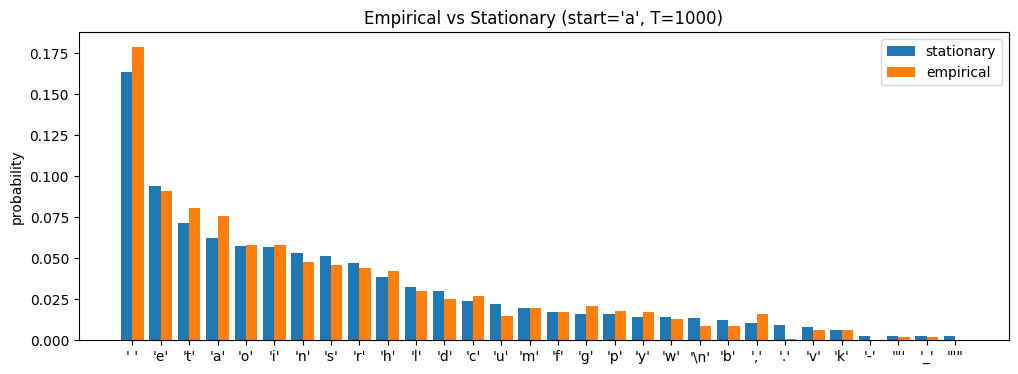

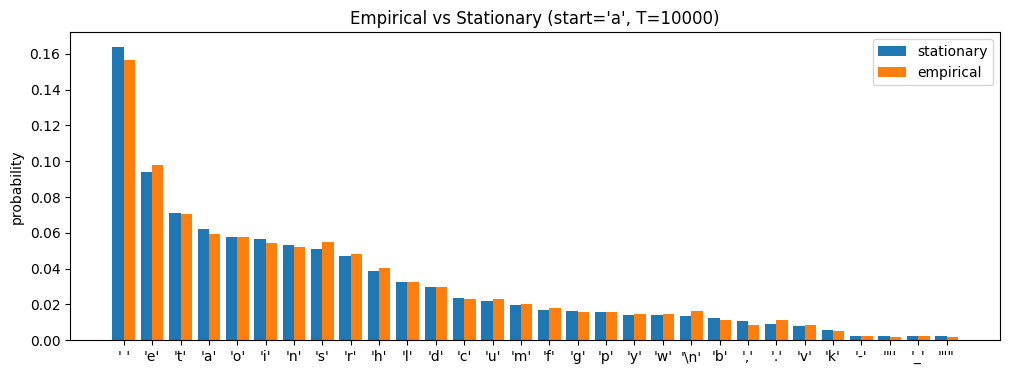

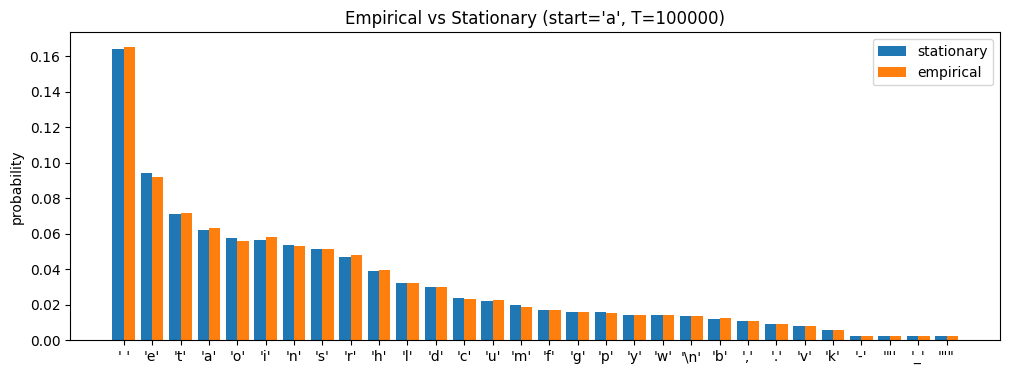

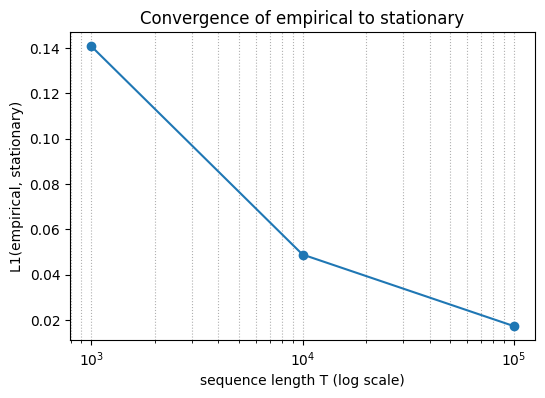

T=   1000  L1 error = 0.1409
T=  10000  L1 error = 0.0489
T= 100000  L1 error = 0.0173


In [7]:
# Plots
import os, numpy as np, matplotlib.pyplot as plt


outdir = "submission/bd469"
os.makedirs(outdir, exist_ok=True)


def l1(p, q): 
    return np.abs(p - q).sum()

def plot_emp_vs_stat(states, emp, stat, title, savepath, top_k=30):
    order = np.argsort(-stat)[:top_k]
    x = np.arange(len(order))
    plt.figure(figsize=(12,4))
    plt.bar(x-0.2, stat[order], width=0.4, label="stationary")
    plt.bar(x+0.2, emp[order],  width=0.4, label="empirical")
    plt.xticks(x, [repr(states[i]) for i in order])
    plt.ylabel("probability")
    plt.title(title)
    plt.legend()
    plt.savefig(savepath, dpi=150, bbox_inches="tight")
    plt.show()


lengths = [1_000, 10_000, 100_000]
start   = 'a' if 'a' in states else states[0]

errors = []
for T in lengths:
    seqT = sample_sequence(transition_matrix, states, start_state=start, length=T)
    empT = empirical_frequencies(seqT)
    errors.append(l1(empT, stationary_dist3))
    plot_emp_vs_stat(
        states, empT, stationary_dist3,
        title=f"Empirical vs Stationary (start={repr(start)}, T={T})",
        savepath=f"{outdir}/hist_T{T}.png",
        top_k=30
    )

# 3) error-vs-length curve (decrease as T grows)
plt.figure(figsize=(6,4))
plt.plot(lengths, errors, marker="o")
plt.xscale("log")
plt.xlabel("sequence length T (log scale)")
plt.ylabel("L1(empirical, stationary)")
plt.title("Convergence of empirical to stationary")
plt.grid(True, which='both', axis='x', linestyle=':')
plt.savefig(f"{outdir}/error_vs_T.png", dpi=150, bbox_inches="tight")
plt.show()

for T, e in zip(lengths, errors):
    print(f"T={T:>7}  L1 error = {e:.4f}")


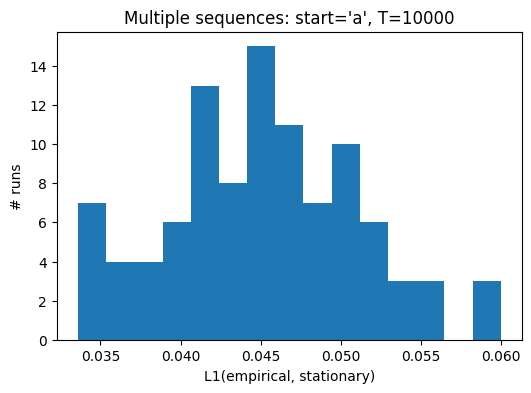

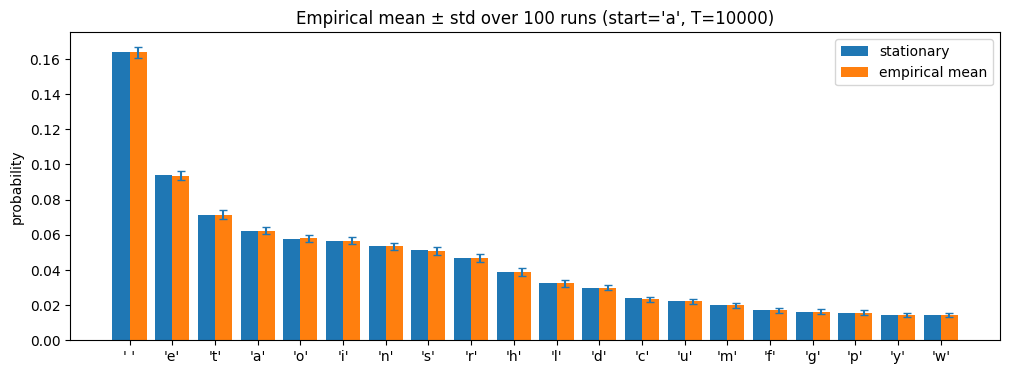

Across 100 runs @ T=10000:  mean L1 = 0.0452, std = 0.0059, min = 0.0336, max = 0.0600


In [8]:
# MULTIPLE SEQUENCES: compare results with plots

import numpy as np, matplotlib.pyplot as plt, os

outdir = "submission/bd469"
os.makedirs(outdir, exist_ok=True)

def l1(p, q):  # ‖p - q‖1
    return np.abs(p - q).sum()

def plot_empirical_mean_std(states, emp_arr, stationary, R, T, start, savepath, top_k=20):
    """Bar chart: stationary vs empirical mean, with std error bars over runs."""
    mean_emp = emp_arr.mean(axis=0)
    std_emp  = emp_arr.std(axis=0)

    order = np.argsort(-stationary)[:top_k]
    x = np.arange(len(order))

    plt.figure(figsize=(12,4))
    plt.bar(x-0.2, stationary[order], width=0.4, label="stationary")
    plt.bar(x+0.2, mean_emp[order],  width=0.4, label="empirical mean")
    
    plt.errorbar(x+0.2, mean_emp[order], yerr=std_emp[order], fmt="none", capsize=3)
    plt.xticks(x, [repr(states[i]) for i in order])
    plt.ylabel("probability")
    plt.title(f"Empirical mean ± std over {R} runs (start={repr(start)}, T={T})")
    plt.legend()
    plt.savefig(savepath, dpi=150, bbox_inches="tight")
    plt.show()

# parameters
T     = 10000            # sequence length for each run (keep fixed)
R     = 100               # number of independent sequences
start = 'a' if 'a' in states else states[0]


emp_list = []
l1_list  = []

for r in range(R):
    seq = sample_sequence(transition_matrix, states, start_state=start, length=T)
    emp = empirical_frequencies(seq)
    emp_list.append(emp)
    l1_list.append(l1(emp, stationary_dist3))

emp_arr = np.vstack(emp_list)
l1_arr  = np.array(l1_list)

# Plot 1: histogram of L1 distances across runs
plt.figure(figsize=(6,4))
plt.hist(l1_arr, bins=15)
plt.xlabel("L1(empirical, stationary)")
plt.ylabel("# runs")
plt.title(f"Multiple sequences: start={repr(start)}, T={T}")
plt.savefig(f"{outdir}/multi_L1_hist_T{T}_R{R}.png", dpi=150, bbox_inches="tight")
plt.show()

#  Plot 2: stationary vs empirical mean ± std (top 20 symbols) 
plot_empirical_mean_std(
    states, emp_arr, stationary_dist3, R, T, start,
    savepath=f"{outdir}/multi_emp_mean_std_T{T}_R{R}.png",
    top_k=20
)

print(f"Across {R} runs @ T={T}:  mean L1 = {l1_arr.mean():.4f}, std = {l1_arr.std():.4f}, "
      f"min = {l1_arr.min():.4f}, max = {l1_arr.max():.4f}")


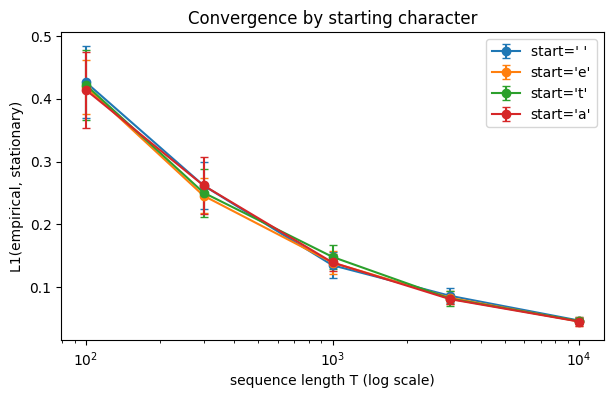

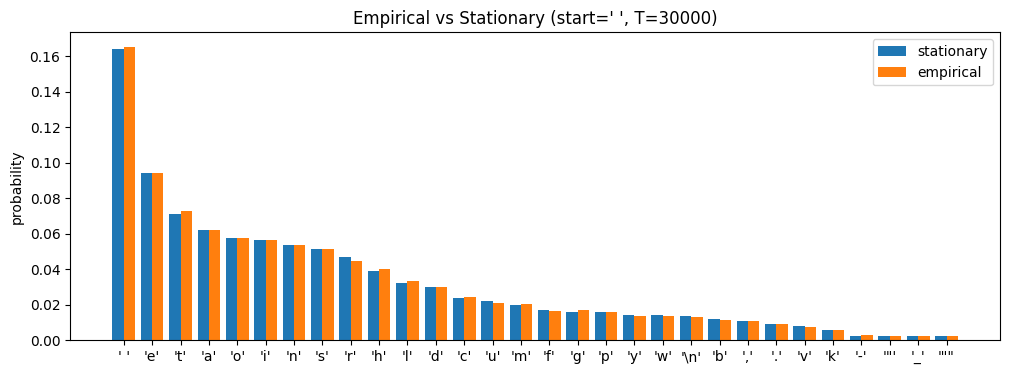

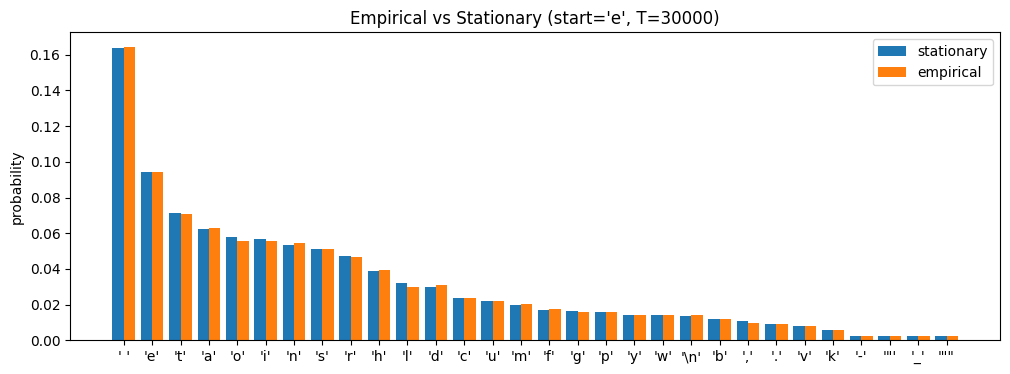

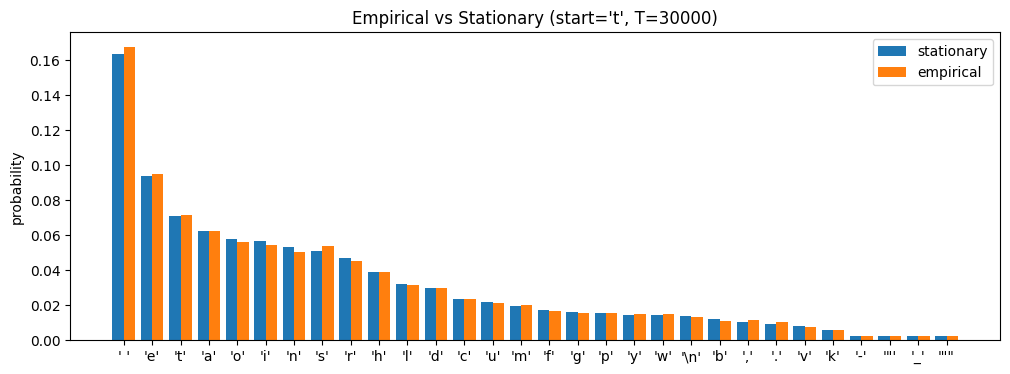

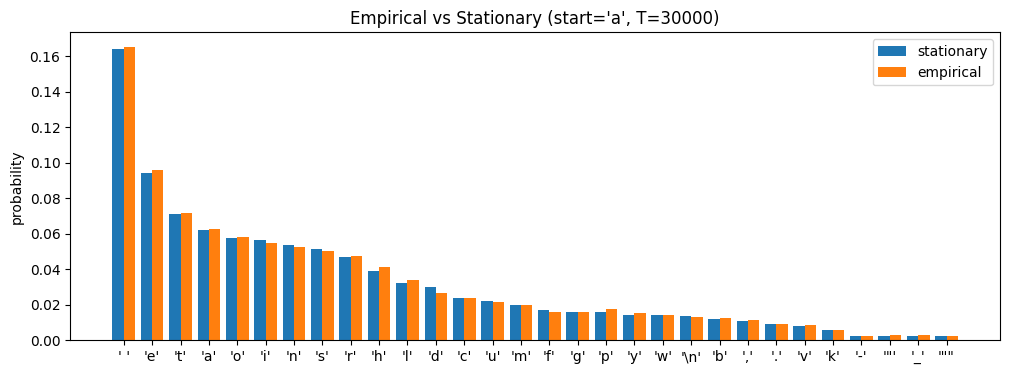


Start ' '
  T=   100  mean L1=0.4055 ± 0.0875
  T=   300  mean L1=0.2489 ± 0.0330
  T=  1000  mean L1=0.1452 ± 0.0195
  T=  3000  mean L1=0.0860 ± 0.0131
  T= 10000  mean L1=0.0469 ± 0.0049

Start 'e'
  T=   100  mean L1=0.4324 ± 0.0731
  T=   300  mean L1=0.2517 ± 0.0371
  T=  1000  mean L1=0.1407 ± 0.0227
  T=  3000  mean L1=0.0819 ± 0.0103
  T= 10000  mean L1=0.0432 ± 0.0068

Start 't'
  T=   100  mean L1=0.4115 ± 0.0593
  T=   300  mean L1=0.2619 ± 0.0324
  T=  1000  mean L1=0.1396 ± 0.0128
  T=  3000  mean L1=0.0787 ± 0.0097
  T= 10000  mean L1=0.0442 ± 0.0075

Start 'a'
  T=   100  mean L1=0.4156 ± 0.0513
  T=   300  mean L1=0.2470 ± 0.0465
  T=  1000  mean L1=0.1371 ± 0.0173
  T=  3000  mean L1=0.0847 ± 0.0108
  T= 10000  mean L1=0.0450 ± 0.0050


In [9]:
& side-by-side bars 

import numpy as np, matplotlib.pyplot as plt, os

outdir = "submission/bd469"
os.makedirs(outdir, exist_ok=True)

def l1(p, q): 
    return np.abs(p - q).sum()

def plot_emp_vs_stat(states, emp, stat, title, savepath, top_k=30):
    order = np.argsort(-stat)[:top_k]
    x = np.arange(len(order))
    plt.figure(figsize=(12,4))
    plt.bar(x-0.2, stat[order], width=0.4, label="stationary")
    plt.bar(x+0.2, emp[order],  width=0.4, label="empirical")
    plt.xticks(x, [repr(states[i]) for i in order])
    plt.ylabel("probability")
    plt.title(title)
    plt.legend()
    plt.savefig(savepath, dpi=150, bbox_inches="tight")
    plt.show()

# stationary vector 
stat = stationary_dist3 if 'stationary_dist3' in globals() else compute_stationary_distribution_eigen(transition_matrix)[0]

# pick a few starts 
candidates = [' ', 'e', 't', 'a']
starts = [c for c in candidates if c in states]
for s in states:
    if len(starts) >= 4: break
    if s not in starts:
        starts.append(s)

# lengths to test + number of independent runs per (start, T)
lengths = [100, 300, 1_000, 3_000, 10_000]
reps = 20

#  L1(empirical, stationary) vs T for each start
plt.figure(figsize=(7,4))
for s0 in starts:
    means, stds = [], []
    for T in lengths:
        d = []
        for _ in range(reps):
            seq = sample_sequence(transition_matrix, states, start_state=s0, length=T)
            emp = empirical_frequencies(seq)
            d.append(l1(emp, stat))
        means.append(np.mean(d)); stds.append(np.std(d))
    plt.errorbar(lengths, means, yerr=stds, marker="o", capsize=3, label=f"start={repr(s0)}")

plt.xscale("log")
plt.xlabel("sequence length T (log scale)")
plt.ylabel("L1(empirical, stationary)")
plt.title("Convergence by starting character")
plt.legend()
plt.savefig(f"{outdir}/starts_convergence.png", dpi=150, bbox_inches="tight")
plt.show()

# Empirical vs stationary bars at large T for each start
T_large = 30_000  
for s0 in starts:
    seq = sample_sequence(transition_matrix, states, start_state=s0, length=T_large)
    emp = empirical_frequencies(seq)
    plot_emp_vs_stat(
        states, emp, stat,
        title=f"Empirical vs Stationary (start={repr(s0)}, T={T_large})",
        savepath=f"{outdir}/starts_hist_{repr(s0)}_{T_large}.png",
        top_k=30
    )

# mean±std L1 per start
for s0 in starts:
    rows = []
    for T in lengths:
        d = []
        for _ in range(reps):
            seq = sample_sequence(transition_matrix, states, start_state=s0, length=T)
            emp = empirical_frequencies(seq)
            d.append(l1(emp, stat))
        rows.append((T, np.mean(d), np.std(d)))
    print(f"\nStart {repr(s0)}")
    for T, m, s in rows:
        print(f"  T={T:>6}  mean L1={m:.4f} ± {s:.4f}")


## Conclusion: Convergence regardless of start.


The error curves for all starts decrease with 
T and coalesce:
T=100: mean L1 ranges ~0.406–0.432 (largest start effect)

T=300: ~0.247–0.262

T=1000: ~0.138–0.145

T=3000: ~0.079–0.086

T=10000: ~0.043–0.047

Large T histograms look the same.
At  T=30,000, the empirical bars nearly overlay the stationary bars for all starts. Differences that remain are tiny and mostly on rare characters (highest variance).

## TASK 222

In [10]:
import numpy as np, matplotlib.pyplot as plt, os

outdir = "submission/bd469"
os.makedirs(outdir, exist_ok=True)

P = transition_matrix   

# Stationary distribution via eigenvector of Pᵀ (λ=1) 
def stationary_from_eigen(P):
    vals, vecs = np.linalg.eig(P.T)
    i = np.argmax(np.abs(vals))
    mu = np.real(vecs[:, i])
    # fix sign/scale and normalize to a prob. vector
    if (mu < 0).sum() > (mu > 0).sum():
        mu = -mu
    mu = np.clip(mu, 0, None)
    mu = mu / mu.sum()
    return mu, vals


if "stationary_dist3" in globals():
    mu_stat = stationary_dist3
    evals = np.linalg.eig(P.T)[0]
else:
    mu_stat, evals = stationary_from_eigen(P)

# Task function:  μ_t = (Pᵀ)^t μ_0
def mu_t(P, mu0, t):
    """Distribution t steps ahead from initial μ0."""
    return np.linalg.matrix_power(P.T, t) @ mu0


def l1(p, q): return np.abs(p - q).sum()

def bar_mu_vs_stationary(states, mu, mu_stat, title, savepath, top_k=30):
    order = np.argsort(-mu_stat)[:top_k]
    x = np.arange(len(order))
    plt.figure(figsize=(12,4))
    plt.bar(x-0.2, mu_stat[order], width=0.4, label="stationary μ")
    plt.bar(x+0.2, mu[order],      width=0.4, label="μ_t")
    plt.xticks(x, [repr(states[i]) for i in order])
    plt.ylabel("probability")
    plt.title(title)
    plt.legend()
    plt.savefig(savepath, dpi=150, bbox_inches="tight")
    plt.show()


In [11]:
n = len(states)
idx = {s:i for i,s in enumerate(states)}

def delta_at(ch):
    v = np.zeros(n); v[idx[ch]] = 1.0
    return v

# 4 different μ0’s
mu0s = {
    "delta_' '": delta_at(' ') if ' ' in idx else delta_at(states[0]),
    "delta_'e'": delta_at('e') if 'e' in idx else delta_at(states[1]),
    "delta_'t'": delta_at('t') if 't' in idx else delta_at(states[2]),
    "uniform":   np.ones(n)/n,
   
    
}

# t values
t_grid = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 3000, 10000]


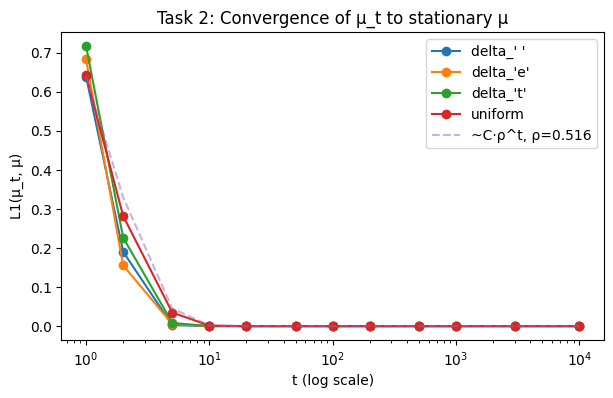

In [12]:
# second-largest eigenvalue magnitude ρ (governs geometric rate)
rho = np.sort(np.abs(evals))[-2]

plt.figure(figsize=(7,4))
for name, mu0 in mu0s.items():
    d = [l1(mu_t(P, mu0, t), mu_stat) for t in t_grid]
    plt.plot(t_grid, d, marker="o", label=name)

ref = next(iter(mu0s.values()))
d0 = l1(mu_t(P, ref, t_grid[0]), mu_stat)
C  = d0 / (rho**t_grid[0] if rho>0 else 1)
plt.plot(t_grid, [C*(rho**t) for t in t_grid], "--", alpha=0.5, label=f"~C·ρ^t, ρ={rho:.3f}")

plt.xscale("log")
plt.xlabel("t (log scale)")
plt.ylabel("L1(μ_t, μ)")
plt.title("Task 2: Convergence of μ_t to stationary μ")
plt.legend()
plt.savefig(f"{outdir}/T2_convergence_by_mu0.png", dpi=150, bbox_inches="tight")
plt.show()


Each colored curve uses a different u0(delta on ' ' /e/ t, and uniform).

All curves drop quickly and then flatten near zero, and they coalesce as t grows: regardless of start, the chain heads to the same μ.

The dashed line “C⋅ρt" uses p = the second-largest eigenvalue magnitude of pt(0.516) track that geometric rate very closely.

In [ ]:
# initial distributions to visualize and a few t's
cases = [
    ("delta_' '",  1),
    ("delta_' '", 10),
    ("delta_' '", 100),
    ("delta_' '", 1000),
    ("uniform",    1),
    ("uniform",   10),
    ("uniform",  100),
    ("uniform", 1000),
]

for name, t in cases:
    mu = mu_t(P, mu0s[name], t)
    bar_mu_vs_stationary(
        states, mu, mu_stat,
        title=f"μ_t vs stationary μ (μ0={name}, t={t})",
        savepath=f"{outdir}/T2_bars_{name.replace(' ','_')}_t{t}.png",
        top_k=30
    )


Bar chart: 

t=1000 steps, the marginal distribution of the chain is already very close to stationary.

## conclusion

Across several initial distributions, the L1 gap decays geometrically at a rate consistent with the second-largest eigenvalue magnitude (0.516). Bar charts at t=1000 already nearly match the stationary histogram, confirming that, regardless of initialization, 
ut →μ for this ergodic bigram chain

# mathematical explaination will upload by picture


# TASK 3

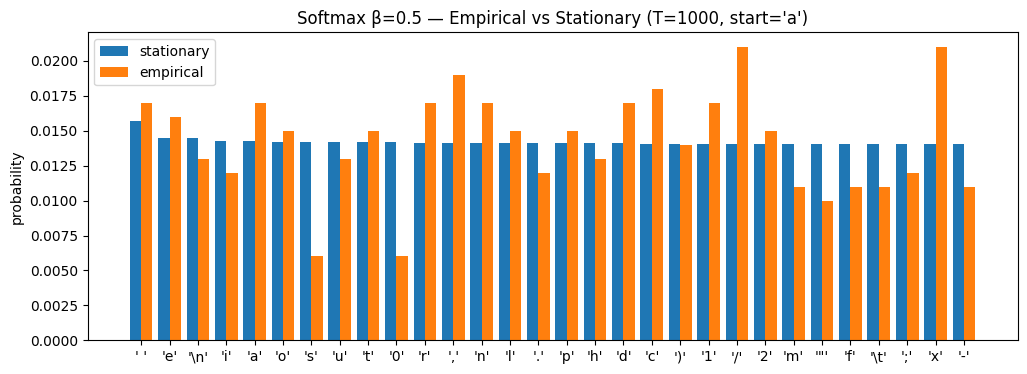

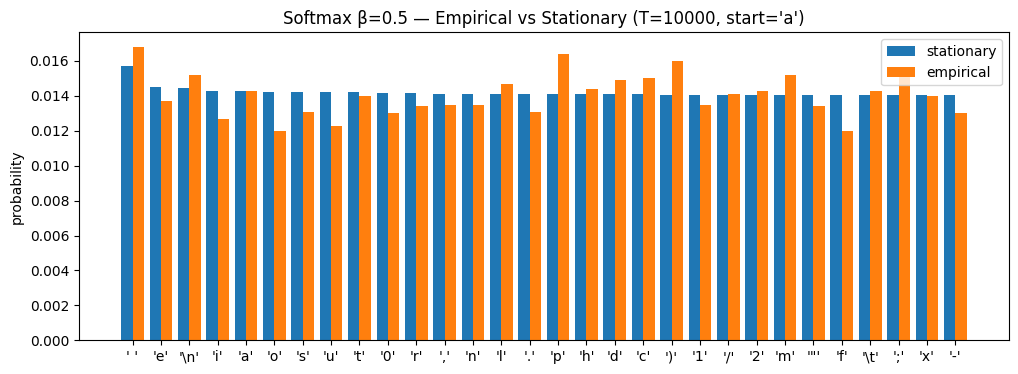

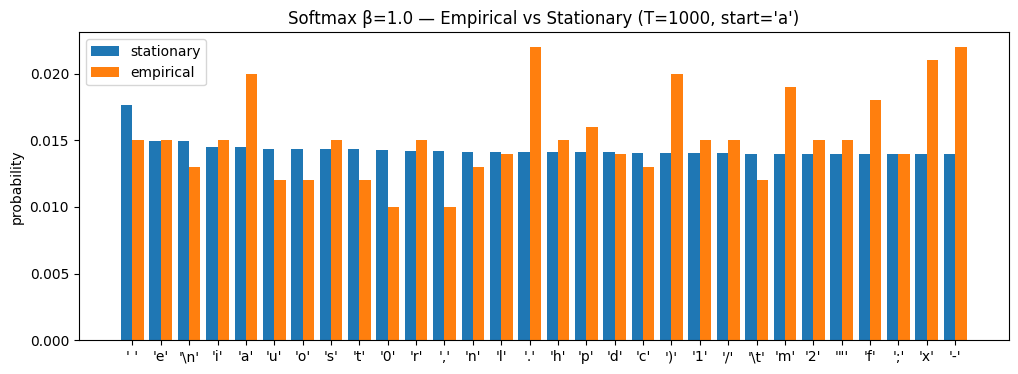

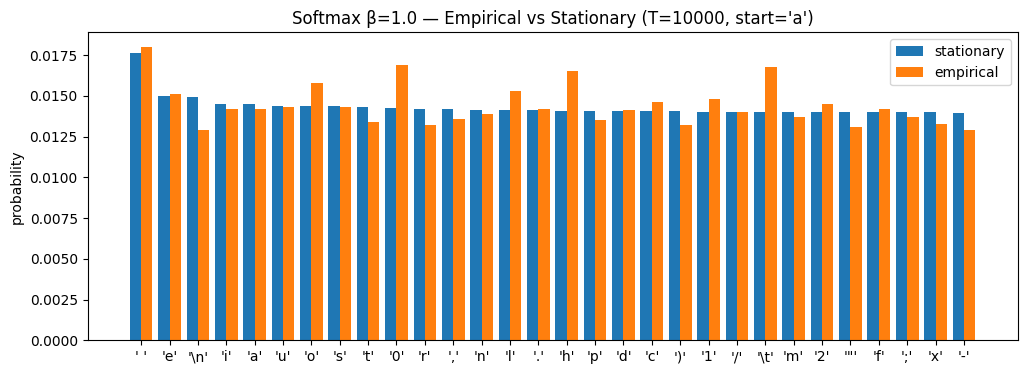

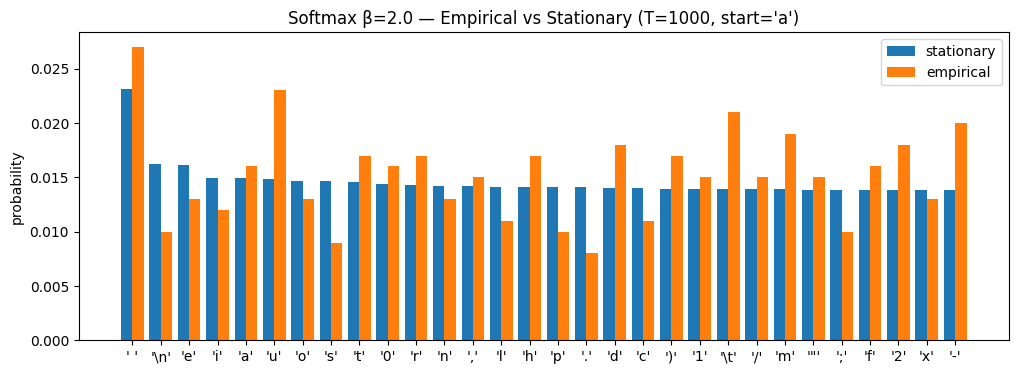

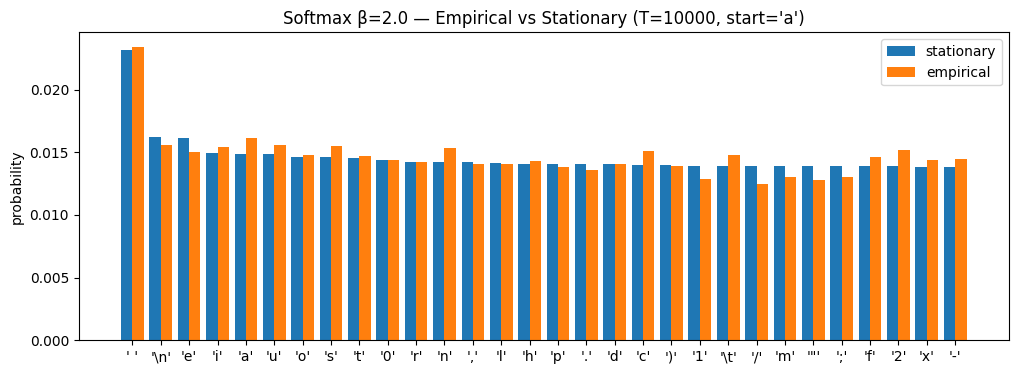

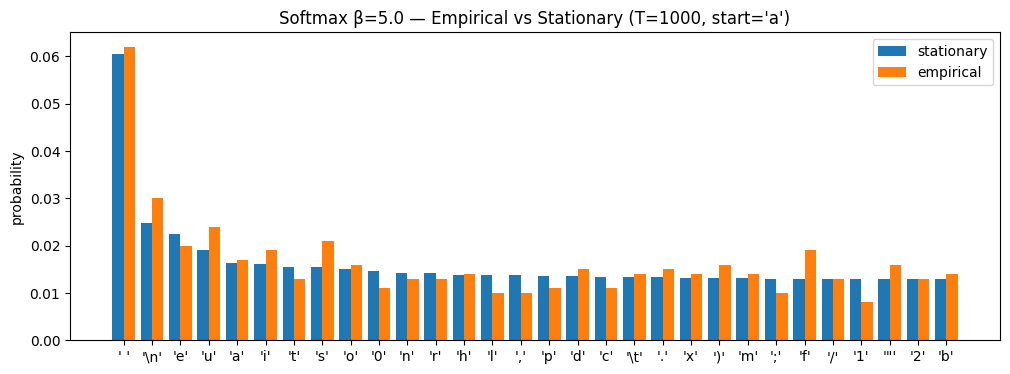

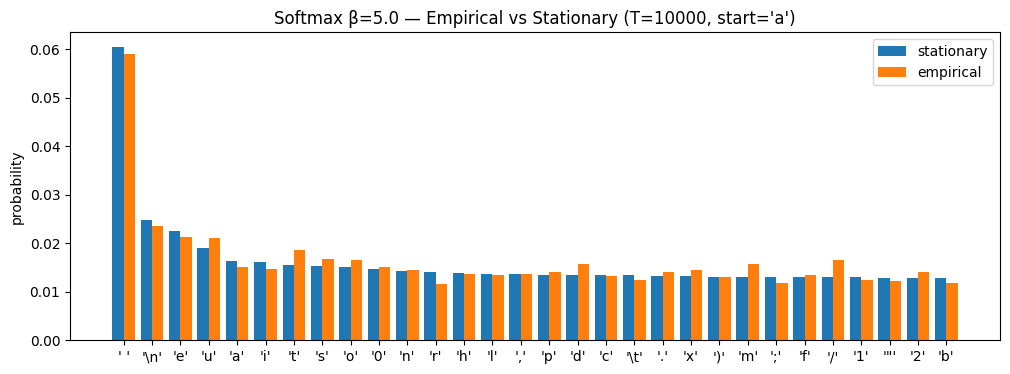

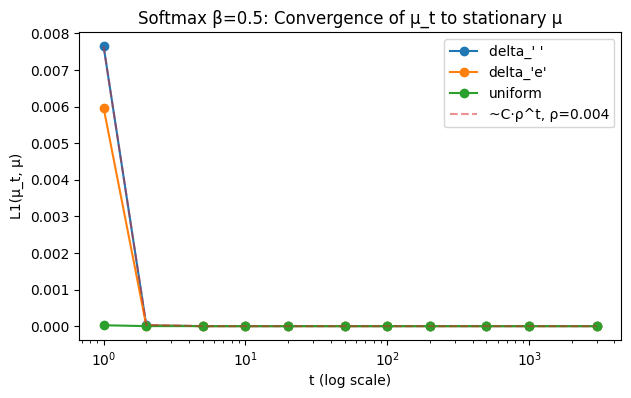

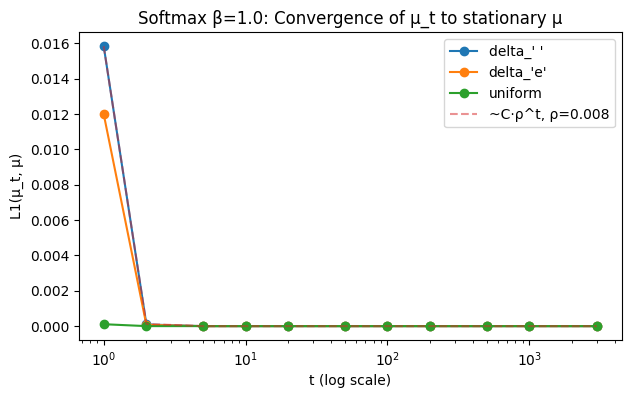

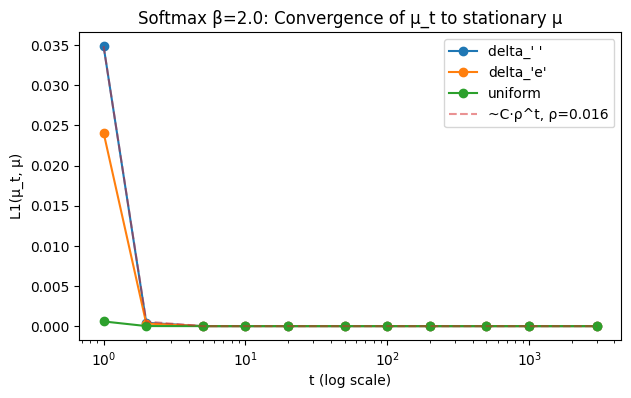

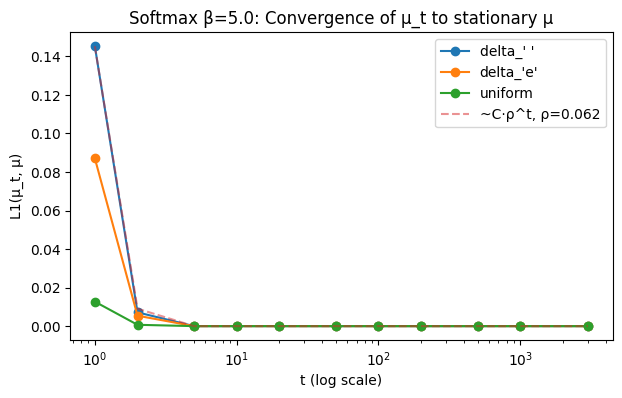


[Softmax β→∞] Deterministic (argmax) sequence snippet:
an the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the t


In [14]:

# Task 3  Softmax transitions
import os
os.makedirs("submission/bd469", exist_ok=True)

rng = np.random.default_rng(0)

# Row-wise softmax of the existing transition matrix 
def softmax_rows(P, beta):

    Q = P.copy()

    # if any row accidentally sums to 0 ,to uniform
    row_sums = Q.sum(axis=1, keepdims=True)
    bad = (row_sums == 0) | ~np.isfinite(row_sums)
    if np.any(bad):
        Q[bad] = 1.0 / Q.shape[1]

    # softmax per row: exp(beta * row ) / sum
    out = np.empty_like(Q)
    for i, row in enumerate(Q):
        z = beta * row
        z -= z.max()
        e = np.exp(z)
        out[i] = e / e.sum()
    return out

def sample_sequence_softmax(P, states, start_state, length=1000, beta=1.0):
    P_beta = softmax_rows(P, beta)
    
    return sample_sequence(P_beta, states, start_state=start_state, length=length)


def l1(p, q): 
    return np.abs(p - q).sum()

def plot_emp_vs_stat(states, emp, stat, title, savepath, top_k=30):
    order = np.argsort(-stat)[:top_k]
    x = np.arange(len(order))
    plt.figure(figsize=(12,4))
    plt.bar(x-0.2, stat[order], width=0.4, label="stationary")
    plt.bar(x+0.2, emp[order],  width=0.4, label="empirical")
    plt.xticks(x, [repr(states[i]) for i in order])
    plt.ylabel("probability")
    plt.title(title)
    plt.legend()
    plt.savefig(savepath, dpi=150, bbox_inches="tight")
    plt.show()

def stationary_from_eigen(P):
    vals, vecs = np.linalg.eig(P.T)
    i = np.argmax(np.abs(vals))
    mu = np.real(vecs[:, i])
    if (mu < 0).sum() > (mu > 0).sum():
        mu = -mu
    mu = np.clip(mu, 0, None)
    mu = mu / mu.sum()
    return mu, vals

def mu_t(P, mu0, t):
    return np.linalg.matrix_power(P.T, t) @ mu0

# Task 1  with softmax sequences + histograms 
betas = [0.5, 1.0, 2.0, 5.0]          # try a few B
start  = 'a' if 'a' in states else states[0]
lengths_for_bars = [1_000, 10_000]    # short vs long sequences

for beta in betas:
    # stationary for the softmaxed chain
    P_beta = softmax_rows(transition_matrix, beta)
    mu_stat_beta, _ = stationary_from_eigen(P_beta)

    for T in lengths_for_bars:
        seq = sample_sequence(P_beta, states, start_state=start, length=T)
        emp = empirical_frequencies(seq)      
        title = f"Softmax β={beta} — Empirical vs Stationary (T={T}, start={repr(start)})"
        save  = f"submission/bd469/T3_softmax_beta{beta}_T{T}.png"
        plot_emp_vs_stat(states, emp, mu_stat_beta, title, save)

# μ_t convergence curves 
idx = {s:i for i,s in enumerate(states)}
def delta_at(ch):
    v = np.zeros(len(states)); v[idx[ch]] = 1.0
    return v

mu0s = {
    "delta_' '": delta_at(' ') if ' ' in idx else delta_at(states[0]),
    "delta_'e'": delta_at('e') if 'e' in idx else delta_at(states[1]),
    "uniform":   np.ones(len(states))/len(states),
}

t_grid = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 3000]

for beta in betas:
    P_beta = softmax_rows(transition_matrix, beta)
    mu_stat_beta, evals = stationary_from_eigen(P_beta)
    rho = np.sort(np.abs(evals))[-2]  # second-largest eigenvalue magnitude

    plt.figure(figsize=(7,4))
    for name, mu0 in mu0s.items():
        d = [l1(mu_t(P_beta, mu0, t), mu_stat_beta) for t in t_grid]
        plt.plot(t_grid, d, marker="o", label=name)

    ref_mu0 = next(iter(mu0s.values()))
    d0 = l1(mu_t(P_beta, ref_mu0, t_grid[0]), mu_stat_beta)
    C  = d0 / (rho**t_grid[0] if rho>0 else 1)
    plt.plot(t_grid, [C*(rho**t) for t in t_grid], "--", alpha=0.5,
             label=f"~C·ρ^t, ρ={rho:.3f}")

    plt.xscale("log")
    plt.xlabel("t (log scale)")
    plt.ylabel("L1(μ_t, μ)")
    plt.title(f"Softmax β={beta}: Convergence of μ_t to stationary μ")
    plt.legend()
    plt.savefig(f"submission/bd469/T3_convergence_beta{beta}.png", dpi=150, bbox_inches="tight")
    plt.show()

#  B goes to infinity limit (deterministic argmax) 
def sample_sequence_greedy(P, states, start_state, length=200):
    idx = {s:i for i,s in enumerate(states)}
    cur = idx[start_state]
    seq = [start_state]
    for _ in range(length-1):
        row = P[cur]
        nxt = np.argmax(row)   # deterministic best next symbol
        seq.append(states[nxt])
        cur = nxt
    return seq

greedy_seq = sample_sequence_greedy(transition_matrix, states, start_state=start, length=400)
print("\n[Softmax β→∞] Deterministic (argmax) sequence snippet:")
print(''.join(greedy_seq[:400]))


# Result

# A. Empirical vs stationary

Bar charts at t = 1000 and t = 10000  show the orange (empirical) bars almost on top of the blue (stationary) bars. This means the chain mixes very fast; even a short sequence essentially samples from its stationary distribution.

# B. Convergence of ut to stationary u
B = 0.5, second eigenvalue magnitude p nearly 0.004, The error drops to nearly 0 by t=2 for all initial distributions, compared with before, Softmax (with B ≤ 1) flattens the rows, dramatically increasing the spectral gap and hence the mixing speed.

# C. when B goes to infinity

The chain becomes deterministic: each character has a single fixed next character. Short substrings look highly plausible (“the”, “an”, “of”), but text quickly loops and loses coherence.
ex:

Deterministic (argmax) sequence snippet:
an the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the t
Selection deleted
